In [285]:
import pandas as pd 
import numpy as np
import seaborn as sns
import nltk
import re
from nltk.corpus import stopwords
from nltk.corpus import stopwords
import string
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
nltk.download("stopwords")
nltk.download('wordnet')
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
nltk.download('omw-1.4')
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


импортируем датасет

In [305]:
df = pd.read_csv('bbc-news-data.csv',sep='\t') 
df

,category,filename,title,content
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...
3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...
...,...,...,...,...
2220,tech,397.txt,BT program to beat dialler scams,BT is introducing two initiatives to help bea...
2221,tech,398.txt,Spam e-mails tempt net shoppers,Computer users across the world continue to i...
2222,tech,399.txt,Be careful how you code,A new European directive could put software w...
2223,tech,400.txt,US cyber security chief resigns,The man making sure US computer networks are ...


удаляем колонку "filename"

In [288]:
df = df.drop(columns=['filename'],axis=1)

In [289]:
df

,category,title,content
0,business,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...
1,business,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...
2,business,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...
3,business,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...
4,business,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...
...,...,...,...
2220,tech,BT program to beat dialler scams,BT is introducing two initiatives to help bea...
2221,tech,Spam e-mails tempt net shoppers,Computer users across the world continue to i...
2222,tech,Be careful how you code,A new European directive could put software w...
2223,tech,US cyber security chief resigns,The man making sure US computer networks are ...


лемметизируем данные

In [290]:
def get_lemmatized_text(corpus):
    from nltk.stem import WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()
    return [' '.join([lemmatizer.lemmatize(word) for word in review.split()]) for review in corpus]
df['title'] = get_lemmatized_text(df['title'])
df['content'] = get_lemmatized_text(df['content'])
df


,category,title,content
0,business,Ad sale boost Time Warner profit,Quarterly profit at US medium giant TimeWarner...
1,business,Dollar gain on Greenspan speech,The dollar ha hit it highest level against the...
2,business,Yukos unit buyer face loan claim,The owner of embattled Russian oil giant Yukos...
3,business,High fuel price hit BA's profit,British Airways ha blamed high fuel price for ...
4,business,Pernod takeover talk lift Domecq,Shares in UK drink and food firm Allied Domecq...
...,...,...,...
2220,tech,BT program to beat dialler scam,BT is introducing two initiative to help beat ...
2221,tech,Spam e-mail tempt net shopper,Computer user across the world continue to ign...
2222,tech,Be careful how you code,A new European directive could put software wr...
2223,tech,US cyber security chief resigns,The man making sure US computer network are sa...


Удаляем лишние символы

In [291]:
df['title'] = df['title'].str.replace('''["\((.*)\)']''', '', regex=True)
df['content'] = df['content'].str.replace('''["\((.*)\)']''', '', regex=True)
df

,category,title,content
0,business,Ad sale boost Time Warner profit,Quarterly profit at US medium giant TimeWarner...
1,business,Dollar gain on Greenspan speech,The dollar ha hit it highest level against the...
2,business,Yukos unit buyer face loan claim,The owner of embattled Russian oil giant Yukos...
3,business,High fuel price hit BAs profit,British Airways ha blamed high fuel price for ...
4,business,Pernod takeover talk lift Domecq,Shares in UK drink and food firm Allied Domecq...
...,...,...,...
2220,tech,BT program to beat dialler scam,BT is introducing two initiative to help beat ...
2221,tech,Spam e-mail tempt net shopper,Computer user across the world continue to ign...
2222,tech,Be careful how you code,A new European directive could put software wr...
2223,tech,US cyber security chief resigns,The man making sure US computer network are sa...


Удаляем цифры

In [292]:
df['title'] = df['title'].str.replace('[0-9]', '', regex=True)
df['content'] = df['content'].str.replace('[0-9]', '', regex=True)
df

,category,title,content
0,business,Ad sale boost Time Warner profit,Quarterly profit at US medium giant TimeWarner...
1,business,Dollar gain on Greenspan speech,The dollar ha hit it highest level against the...
2,business,Yukos unit buyer face loan claim,The owner of embattled Russian oil giant Yukos...
3,business,High fuel price hit BAs profit,British Airways ha blamed high fuel price for ...
4,business,Pernod takeover talk lift Domecq,Shares in UK drink and food firm Allied Domecq...
...,...,...,...
2220,tech,BT program to beat dialler scam,BT is introducing two initiative to help beat ...
2221,tech,Spam e-mail tempt net shopper,Computer user across the world continue to ign...
2222,tech,Be careful how you code,A new European directive could put software wr...
2223,tech,US cyber security chief resigns,The man making sure US computer network are sa...


Приводим к нижнему регистру

In [293]:
df['title'] = df['title'].apply(lambda x: x.lower())
df['content'] = df['content'].apply(lambda x: x.lower())
df

,category,title,content
0,business,ad sale boost time warner profit,quarterly profit at us medium giant timewarner...
1,business,dollar gain on greenspan speech,the dollar ha hit it highest level against the...
2,business,yukos unit buyer face loan claim,the owner of embattled russian oil giant yukos...
3,business,high fuel price hit bas profit,british airways ha blamed high fuel price for ...
4,business,pernod takeover talk lift domecq,shares in uk drink and food firm allied domecq...
...,...,...,...
2220,tech,bt program to beat dialler scam,bt is introducing two initiative to help beat ...
2221,tech,spam e-mail tempt net shopper,computer user across the world continue to ign...
2222,tech,be careful how you code,a new european directive could put software wr...
2223,tech,us cyber security chief resigns,the man making sure us computer network are sa...


Векторизируем данные

In [294]:
count = CountVectorizer(stop_words="english")
title = count.fit_transform(list(df['title']))
content = count.fit_transform(list(df['content']))
df.title= title.toarray()
df.content=title.toarray()

In [295]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['category'] = labelencoder.fit_transform(df['category'])
df

,category,title,content
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
2220,4,0,0
2221,4,0,0
2222,4,0,0
2223,4,0,0


In [296]:
labelencoder.fit_transform(df['category'])

array([0, 0, 0, ..., 4, 4, 4])

Векторизируем, кодируем ,делим данные на тренировочные и тестовые

In [306]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = (stopwords.words('english')) # список стоп-слов
vectorizer = TfidfVectorizer(stop_words=stop_words)
X = vectorizer.fit_transform(df.content.values.astype('U'))
y = df['category'].values
le = preprocessing.LabelEncoder()
le.fit(df.category)
df.category = le.transform(df.category)
y = df.category
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Смторим точность логистической регрессии

In [307]:
logisticRegr = LogisticRegression() 
logisticRegr.fit(X_train, y_train)
y_pred = logisticRegr.predict(X_test)
accuracy_score(y_pred, y_test)

0.9768707482993197

In [308]:
logisticRegr.score(X_test, y_test)

0.9768707482993197

создание объекта RandomForestClassifier

In [309]:
rf = RandomForestClassifier()

С помощью gridSearch перебрать выполнить перебор параметров, для 
увеличения точности работы модели.

In [310]:
grid_space={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200],
              'max_features':[1,3,5,7],
              'min_samples_leaf':[1,2,3],
              'min_samples_split':[1,2,3]
           }
grid = GridSearchCV(rf,param_grid=grid_space,cv=3,scoring='accuracy')
model_grid = grid.fit(X_train,y_train)
print('Best hyperparameters are: '+str(model_grid.best_params_))
print('Best score is: '+str(model_grid.best_score_))

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
432 fits failed out of a total of 1296.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
432 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.9/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.9/dist-packages/sklearn/utils/

Best hyperparameters are: {'max_depth': None, 'max_features': 5, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 200}
Best score is: 0.9510017091798101


Строим кривые валидации для о гиперпараметров "max_depth", n_estimators 

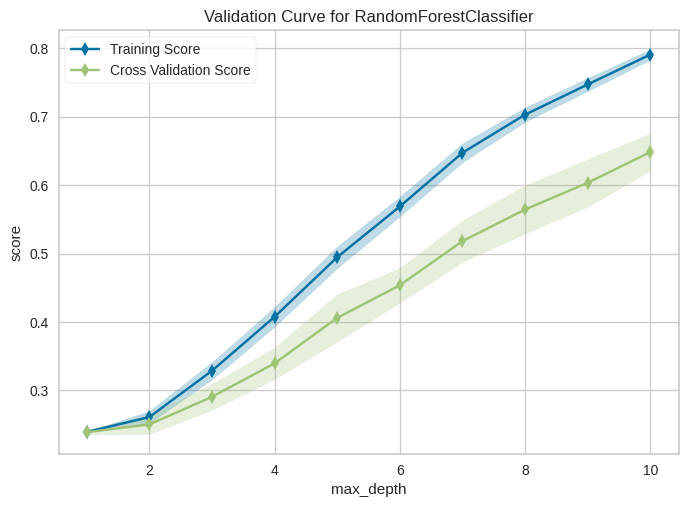

ValidationCurve(ax=<Axes: title={'center': 'Validation Curve for RandomForestClassifier'}, xlabel='max_depth', ylabel='score'>,
                cv=10,
                estimator=RandomForestClassifier(max_features=7,
                                                 n_estimators=200,
                                                 random_state=42),
                param_name='max_depth',
                param_range=array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                scoring='accuracy')


In [311]:
from yellowbrick.model_selection import validation_curve 
rf = RandomForestClassifier(n_estimators=200, max_features=7,
                           max_depth=None, min_samples_leaf=1, random_state=42)

# Plot the validation curve
print(validation_curve(rf, X_train, y_train, param_name="max_depth",
      param_range=np.arange(1, 11), cv=10, scoring="accuracy"))

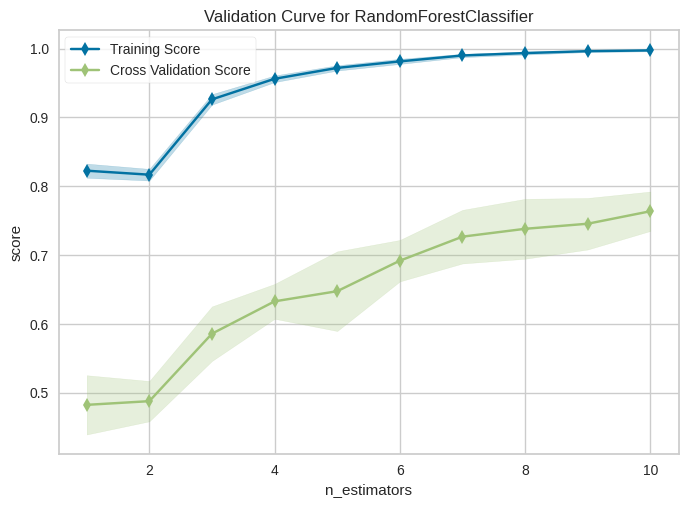

ValidationCurve(ax=<Axes: title={'center': 'Validation Curve for RandomForestClassifier'}, xlabel='n_estimators', ylabel='score'>,
                cv=10,
                estimator=RandomForestClassifier(max_features=7,
                                                 n_estimators=200,
                                                 random_state=42),
                param_name='n_estimators',
                param_range=array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                scoring='accuracy')


In [312]:
from yellowbrick.model_selection import validation_curve 
rf = RandomForestClassifier(n_estimators=200, max_features=7,
                           max_depth=None, min_samples_leaf=1, random_state=42)

# Plot the validation curve
print(validation_curve(rf, X_train, y_train, param_name="n_estimators",
      param_range=np.arange(1, 11), cv=10, scoring="accuracy"))